## 1. Kısım Model Eğitimi ve Doğrulama

In [1]:
import numpy as np
from pycaret.datasets import get_data
from pycaret.regression import *

from sklearn.model_selection import train_test_split

In [2]:
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
dataset.dtypes

Carat Weight    float64
Cut              object
Color            object
Clarity          object
Polish           object
Symmetry         object
Report           object
Price             int64
dtype: object

In [4]:
dataset.shape

(6000, 8)

In [5]:
dataset.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [8]:
cat_features = dataset.select_dtypes(include=['object']).columns.tolist()
print("Categorical features (object type):", cat_features)


Categorical features (object type): ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']


In [9]:
num_features = dataset.drop(["Price"], axis = 1).select_dtypes(include='number').columns.tolist()

In [20]:
s = setup(data = dataset, 
          target = 'Price', 
          train_size = 0.7,
          categorical_features = cat_features,
          numeric_features = num_features,
          categorical_imputation="mode",
          normalize = True, 
          normalize_method = 'minmax',
          session_id=42,
          fold_strategy= 'kfold', 
          fold = 10)

,Description,Value
0,Session id,42
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


In [21]:
get_config('X_train_transformed')


,Carat Weight,Cut_Ideal,Cut_Very Good,Cut_Good,Cut_Signature-Ideal,Cut_Fair,Color_G,Color_H,Color_D,Color_F,...,Clarity_FL,Polish_EX,Polish_VG,Polish_G,Polish_ID,Symmetry_EX,Symmetry_VG,Symmetry_G,Symmetry_ID,Report
4775,0.583333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
927,0.185185,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3258,0.361111,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45,0.319444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1260,0.407407,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5191,0.939815,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5226,0.578704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5390,0.120370,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
get_config('X_test_transformed')


,Carat Weight,Cut_Ideal,Cut_Very Good,Cut_Good,Cut_Signature-Ideal,Cut_Fair,Color_G,Color_H,Color_D,Color_F,...,Clarity_FL,Polish_EX,Polish_VG,Polish_G,Polish_ID,Symmetry_EX,Symmetry_VG,Symmetry_G,Symmetry_ID,Report
1782,0.384259,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3917,0.407407,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
221,0.268519,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2135,0.143518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5224,0.120370,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,0.148148,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
841,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2572,0.597222,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1189,0.365741,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [24]:
best = compare_models(fold=10, cross_validation=True, sort='R2', round=4, n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,768.1653,2623238.3541,1574.0232,0.9752,0.0818,0.0603,0.5070
rf,Random Forest Regressor,761.9046,2913062.1762,1644.3041,0.9725,0.0808,0.0588,0.4410
gbr,Gradient Boosting Regressor,890.9662,3019897.0677,1714.2395,0.9710,0.1007,0.0759,0.1580
lightgbm,Light Gradient Boosting Machine,755.5459,3105329.7208,1697.2430,0.9708,0.0784,0.0568,0.2300
dt,Decision Tree Regressor,991.0456,4840629.3480,2144.0626,0.9533,0.1044,0.0760,0.0620
ridge,Ridge Regression,2443.6532,14225294.8847,3750.5095,0.8618,0.6329,0.2885,0.0540
br,Bayesian Ridge,2456.7564,14540658.5272,3791.7031,0.8587,0.6348,0.2901,0.0580
lasso,Lasso Regression,2455.1586,14550260.7206,3792.6308,0.8586,0.6440,0.2896,0.0780
llar,Lasso Least Angle Regression,2455.1806,14550274.8976,3792.6329,0.8586,0.6436,0.2897,0.0490
lr,Linear Regression,2471.3020,14736061.7526,3816.2417,0.8568,0.6386,0.2916,1.2970


In [25]:
best.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Bir modele ince-ayar çekme

In [26]:
tuned_extra_trees_regressor = tune_model(estimator = best, fold = 10, search_library = 'scikit-learn', search_algorithm = 'random')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1656.6420,10715373.4845,3273.4345,0.8980,0.1794,0.1388
1,1626.2880,8565499.5646,2926.6875,0.9160,0.1601,0.1313
2,1604.2658,8216173.3290,2866.3868,0.9128,0.1733,0.1438
3,1621.0128,8581574.7474,2929.4325,0.9096,0.1740,0.1398
4,1676.2211,9120302.2633,3019.9838,0.9048,0.1660,0.1335
5,1760.5271,17985399.7995,4240.9197,0.8593,0.1733,0.1387
6,1705.7766,10565273.7094,3250.4267,0.9022,0.1660,0.1364
7,1630.3348,8301862.0353,2881.2952,0.9159,0.1780,0.1504
8,1562.7900,8170449.0845,2858.3997,0.9144,0.1645,0.1343


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [27]:
tuned_extra_trees_regressor.get_params()


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [28]:
extratrees_params = {
    'n_estimators': np.arange(100, 1100, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5, 1)
}

In [29]:
tuned_extra_trees_regressor = tune_model(estimator = best, custom_grid = extratrees_params, fold = 10, search_library = 'scikit-learn', search_algorithm = 'random')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1755.2603,11772641.8979,3431.1284,0.8880,0.2177,0.1609
1,1565.8260,8544188.3859,2923.0444,0.9162,0.2130,0.1540
2,1574.0746,8229920.5772,2868.7838,0.9127,0.2104,0.1617
3,1500.3825,10194987.4974,3192.9591,0.8926,0.1927,0.1411
4,1566.9206,9306330.0646,3050.6278,0.9029,0.2156,0.1575
5,1888.2314,20196594.4602,4494.0621,0.8420,0.2124,0.1592
6,1758.6038,12242078.4156,3498.8682,0.8867,0.2225,0.1649
7,1459.2867,7955349.0810,2820.5228,0.9195,0.2093,0.1548
8,1513.0547,8783204.0373,2963.6471,0.9080,0.2014,0.1512


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


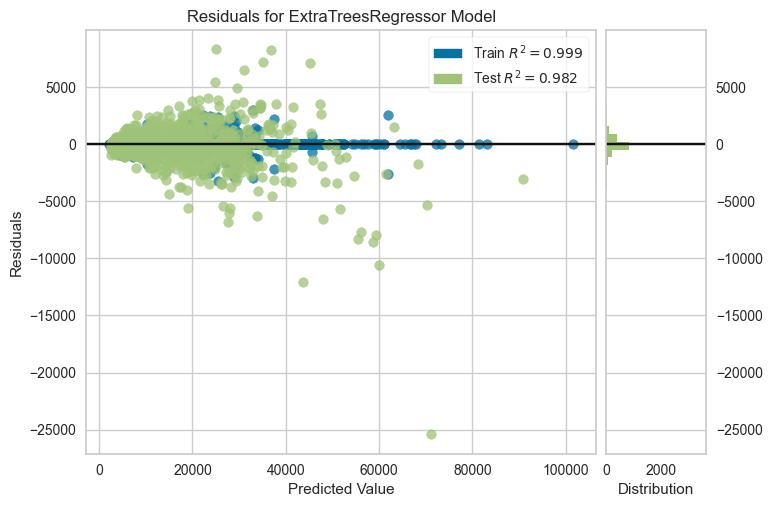

In [30]:
plot_model(estimator = tuned_extra_trees_regressor, plot = 'residuals')


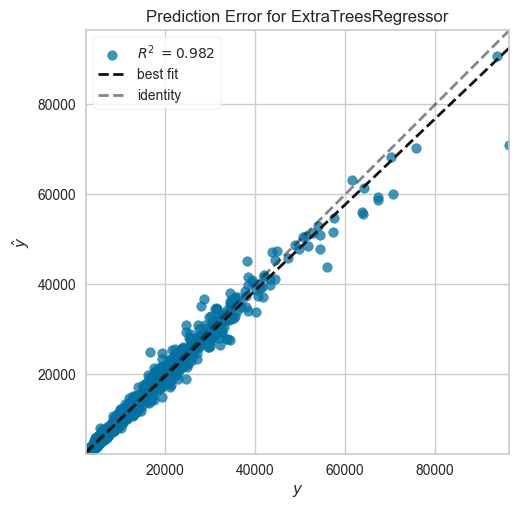

In [31]:
plot_model(estimator = tuned_extra_trees_regressor, plot = 'error')


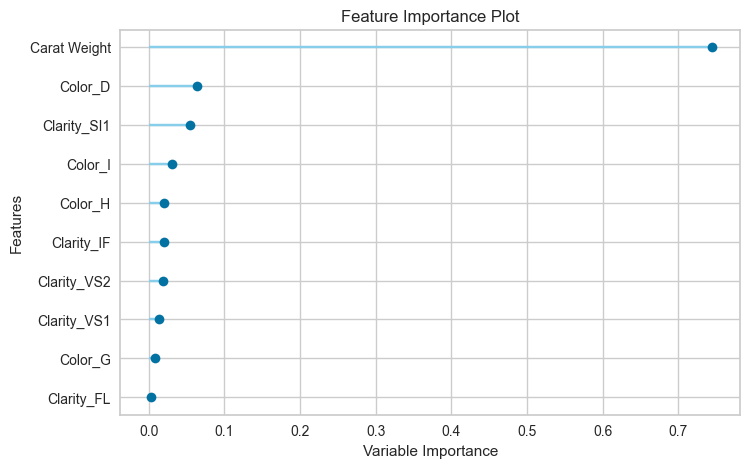

In [33]:
plot_model(estimator = tuned_extra_trees_regressor, plot='feature')


In [34]:
evaluate_model(tuned_extra_trees_regressor)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [35]:
predict_model(tuned_extra_trees_regressor)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,696.5166,1896319.8825,1377.0693,0.9824,0.0754,0.0561


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
1782,1.58,Ideal,H,VS2,EX,VG,GIA,11419,12345.900000
3917,1.63,Ideal,G,VS1,EX,EX,GIA,16241,16928.690000
221,1.33,Ideal,G,VVS2,EX,EX,GIA,12345,11905.950000
2135,1.06,Very Good,I,SI1,VG,EX,GIA,4507,4489.180000
5224,1.01,Very Good,H,VVS2,EX,VG,GIA,5908,6289.045000
...,...,...,...,...,...,...,...,...,...
3543,1.07,Very Good,F,SI1,VG,VG,GIA,6061,5440.526667
841,1.11,Ideal,G,VS1,EX,EX,GIA,7917,8435.666667
2572,2.04,Very Good,F,VVS2,VG,G,GIA,34458,37985.470000
1189,1.54,Very Good,I,VS2,VG,VG,GIA,8788,9474.050000


In [36]:
final_extra_trees_regressor = finalize_model(tuned_extra_trees_regressor)


In [37]:
predict_model(final_extra_trees_regressor, data = dataset)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,91.2786,98026.0565,313.0911,0.9991,0.0224,0.0090


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,5169.000000
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,3451.500000
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,3183.000000
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,4327.000000
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3171.000000
...,...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6430.000000
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328,5584.666667
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157,6098.500000
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206,11206.000000


In [38]:
save_model(model = final_extra_trees_regressor, model_name = 'myMLmodel', model_only = False)


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry', 'Report'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Rep...
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                                                     'Polish',
                               

## 2. KISIM - WEB